# Explore approaches to simplifying basin geometries

For faster selection of LINKNO from Lat/Lon and faster creation of upstream boundary via aggregation/dissolution of geometries (developed in `sandbox/combine_into_single_polygon.ipynb`)

# Python Imports

In this step we will import the necessary python dependencies for this example

In [1]:
from pathlib import Path
import re
from importlib import reload

import pyogrio
import geopandas as gpd
import pandas as pd

import global_hydrography as gh
# from global_hydrography.delineation.mnsi import modified_nest_set_index
# from global_hydrography.preprocess import TDXPreprocessor

In [2]:
# Explore the namespace for global-hydrography modules, functions, etc.
dir(gh)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'delineation',
 'io',
 'mnsi',
 'preprocess',
 'process']

# Compile files that need to be processed

In this step we will compile a list of the files that need to be processed to have a modified nested set index. Note this step assumes that you have downloaded the files to the same directory and used the same naming convention as the `1_GetData.ipynb` example notebook. If you have opted to use a different location or naming convention you will need to modify this step accordingly.

In [3]:
# Confirm your current working directory (cwd) and repo/project directory
working_dir = Path.cwd()
project_dir = working_dir.parent
data_dir = project_dir / 'data_temp' # a temporary data directory that we .gitignore
tdx_dir = data_dir / 'nga'

In [4]:
tdx_hydro_region = 7020038340

In [5]:
streamnet_file, basins_file = gh.process.select_tdx_files(
    tdx_dir / 'processed', 
    tdx_hydro_region,
    '.parquet'
)
basins_file.name

'TDX_streamreach_basins_mnsi_7020038340_01.parquet'

In [6]:
# Read 4897 rows where 'ROOT_ID'==750288662
basins_subset_gpd = gpd.read_parquet(
    basins_file,
    filters=[('ROOT_ID', '==', 750288662)]
)

In [8]:
basins_subset_gpd.info()
basins_subset_gpd.index

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4897 entries, 750000278 to 750301685
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   geometry       4897 non-null   geometry
 1   ROOT_ID        4897 non-null   int32   
 2   FINISH_TIME    4897 non-null   int32   
 3   DISCOVER_TIME  4897 non-null   int32   
dtypes: geometry(1), int32(3)
memory usage: 114.8 KB


Index([750000278, 750000279, 750001462, 750003239, 750000870, 750000871,
       750001463, 750001464, 750002055, 750002056,
       ...
       750281556, 750300501, 750301093, 750168486, 750169078, 750169670,
       750170262, 750288070, 750288662, 750301685],
      dtype='int32', name='LINKNO', length=4897)

# Simplify

Vector Simplification in Model My Watershed:
- Uses PostGIS ST_SimplifyPreserveTopology (Performed by the GEOS module) 
- Was done for HUC-12s (but not -10s or -8s) in ModelMW https://github.com/WikiWatershed/model-my-watershed/commit/27c2a6966ca6e57fe51c0a0d4b6d604707c0af6f
  - “HUC12, simplified the polygon with a .00008 threshold”
- Anthony: Also available for GeoPandas with https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.simplify.html 

Tolerance has the same units as the coordinate reference system of the GeoSeries.

In [9]:
basins_subset_gpd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
basins_simplified_gpd = basins_subset_gpd.simplify(
    tolerance=0.00008,
)
basins_simplified_gpd.info()

In [11]:
basins_simplified_gpd.info()

<class 'geopandas.geoseries.GeoSeries'>
Index: 4897 entries, 750000278 to 750301685
Series name: None
Non-Null Count  Dtype   
--------------  -----   
4897 non-null   geometry
dtypes: geometry(1)
memory usage: 57.4 KB


<Axes: >

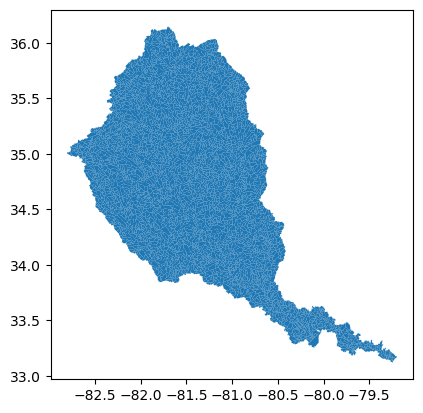

In [12]:
basins_simplified_gpd.plot()